## Problem: Predicting heart disease
## Methodology: t-distributed Stochastic Neighbor Embedding (t-SNE)
## Data: Heart disease dataset from the UC Irvine Machine Learning
### t-SNE algorithm analyzes a dataset's features and reduces them to the specific number of dimensions.

### Like PCA, t-SNE is a dimensionality reduction technique that tries to find a good representation of the high-dimensional data in the low-dimensional space. In order to accomplish this, t-SNE measures the similarity between the data points both in high-dimensional space and low-dimensional space and then tries to minimize the divergence between the two similarities calculated in the high and the low dimensional spaces. 

PCA tries to preserve the large pairwise distances between the data points whereas t-SNE tries to preserve the small pairwise distances between them. Hence, t-SNE better represents the local similarities in the data whereas PCA better represents the dissimilarities in the data. 

PCA is a linear method that tries to retain the variance in the data as much as it can whereas t-SNE is a non-linear method that minimizes the divergence between the distributions of high-dimensional data and the low-dimensional representation it produces. 

Here's how t-SNE works 
The t-SNE algorithm follows these steps:

1. Measure the Gaussian similarity between all points, by calculating the Euclidean (spatial) distance between points and then calculating the value of a Gaussian curve at that distance.
2. Position the data points in the lower dimensional space in a random fashion.
3. Calculate the t-similarity between all the points in the lower dimensional space.
4. Optimize the positions of the data points in the lower dimensional space by following the gradient of a loss function. 5. Adjust the data points in the lower dimensional space by using gradient descent, moving points that were close in the high-dimensional data closer together and moving points that were further away further from each other:


#### How DBSCAN works:
##### Out of n unvisited sample data points, we'll first move through each point in a loop and mark each one as visited.
##### From each point, we'll look at the distance to every other point in the dataset.
##### All points that fall within the neighborhood radius hyperparameter should be considered as neighbors.
##### The number of neighbors should be at least as many as the minimum points required.
##### If the minimum point threshold is reached, the points should be grouped together as a cluster, or else marked as noise.
##### This process should be repeated until all data points are categorized in clusters or as noise.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selectiaon import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")
from numpy import percentile
from numpy.random import seed
import os
import datetime
from sqlalchemy import create_engine
import scipy
from scipy.special import comb

In [10]:
import sklearn.datasets
from sklearn import decomposition
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metricser
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', -1) 

In [5]:
# Get the data from remote database
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [15]:
# Save the data locally
path = 'c:\\Analytics\\education_pipeline\\data'
os.chdir(path)
export_location = os.path.join(path, 't.csv') ### File


def to_csv(self, path, index=True, sep=",", na_rep='', float_format=None,
           header=False, index_label=None, mode='w', nanRep=None,
           encoding=None, date_format=None, decimal='.'):
    """
    Write Series to a comma-separated values (csv) file
    ...
    """
    from pandas.core.frame import DataFrame
    df = DataFrame(self)
    # result is only a string if no path provided, otherwise None
    result = df.to_csv(path, index=index, sep=sep, na_rep=na_rep,
                       float_format=float_format, header=header,
                       index_label=index_label, mode=mode, nanRep=nanRep,
                       encoding=encoding, date_format=date_format,
                       decimal=decimal)
    if path is None:
        return result

In [4]:
# Read the date
path1 = 'c:\\dev_data\\1st_project\\thinkful'
os.chdir(path1)
heartdisease_df_file = os.path.join(path1, 'heartdisease.csv')     ### File
heartdisease_df = pd.read_csv(heartdisease_df_file)  

In [115]:
# Make sure the number of rows divides evenly into four samples.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]
df = df.replace(to_replace='?', value=0)

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13].astype(float)

# Replace some random string values.
X = X.replace(to_replace='?', value=0)
del X['Unnamed: 0']
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [121]:
# Run DBSCAN algorithm on the standardized data.

# Normalize
X_std = StandardScaler().fit_transform(X)

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

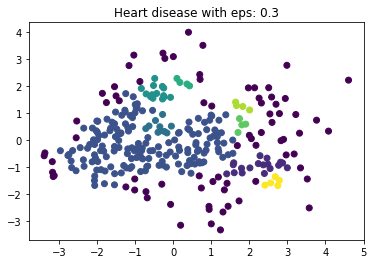

Adjusted Rand Index of the DBSCAN solution: 0.0035219384642228035
The silhouette score of the DBSCAN solution: -0.1712955389562294


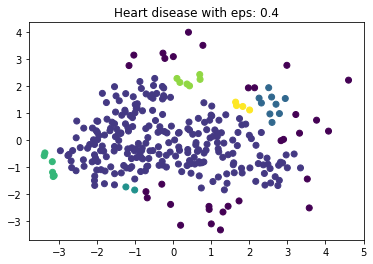

Adjusted Rand Index of the DBSCAN solution: -0.011063187271841211
The silhouette score of the DBSCAN solution: -0.2022580046466181


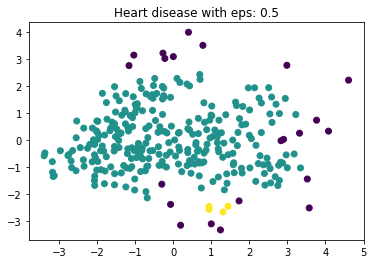

Adjusted Rand Index of the DBSCAN solution: -0.011441878799275499
The silhouette score of the DBSCAN solution: 0.1570163331658951


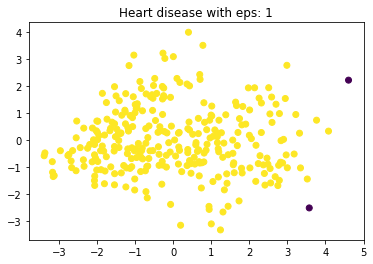

Adjusted Rand Index of the DBSCAN solution: -0.006621777292217098
The silhouette score of the DBSCAN solution: 0.4265792206855972


In [174]:
# Explore potential of "minimum point threshold" as a hypermeter. And evaluation each result using Adjusted Rand Index and Silhouette score

eps = [0.3,0.4,0.5,1]
for ep in eps:

    db = DBSCAN(eps=ep, min_samples=4, metric='euclidean')
    plt.scatter(X_pca[:,0], X_pca[:,1], c=db.fit_predict(X_pca))
    plt.title('Heart disease with eps: ' + str(ep))
    plt.show()
    clusters = db.fit_predict(X_pca) # For Adjusted Rand Index calculation
    print("Adjusted Rand Index of the DBSCAN solution: {}"
    .format(metrics.adjusted_rand_score(y, clusters)))
    print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))


#### We just saw how impactful setting the proper neighborhood radius is on the performance of DBSCAN result. For small neighborhood =esp), all the data will be treated as noise. For a very large neighborhood, then all of the data will similarly be grouped together into one cluster. In other words we either have total signal or total noise which again defeat the purpose of clustering. We can also conclude that it is very difficult to perform effective clustering using only the neighborhood size. Next we need to incorporate a minimum points threshold.

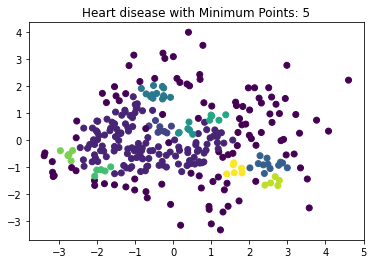

Adjusted Rand Index of the DBSCAN solution: -0.006621777292217098
The silhouette score of the DBSCAN solution: 0.4265792206855972


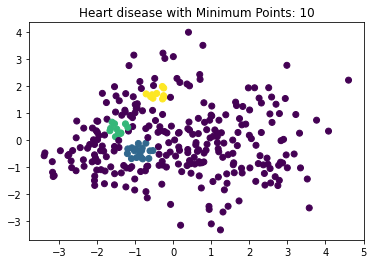

Adjusted Rand Index of the DBSCAN solution: -0.006621777292217098
The silhouette score of the DBSCAN solution: 0.4265792206855972


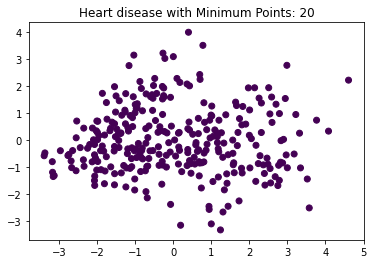

Adjusted Rand Index of the DBSCAN solution: -0.006621777292217098
The silhouette score of the DBSCAN solution: 0.4265792206855972


In [180]:
# Explore potential of "minimum point threshold" as a hypermeter. And evaluation each result using Adjusted Rand Index and Silhouette score

num_samples = [5,10,20]

for min_num in num_samples:

    db = DBSCAN(eps=0.3, min_samples=min_num, metric='euclidean')

    plt.scatter(X_pca[:,0], X_pca[:,1], c=db.fit_predict(X_pca))
    plt.title('Heart disease with Minimum Points: ' + str(min_num))
    plt.show()
    
    print("Adjusted Rand Index of the DBSCAN solution: {}"
    .format(metrics.adjusted_rand_score(y, clusters)))
    print("The silhouette score of the DBSCAN solution: {}"
    .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))


## Visualize how DBSCAN assigned clusters to the observations by using the first two principal components of our data. 



## Pick best parameters and get a final checl

In [192]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=0.4, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

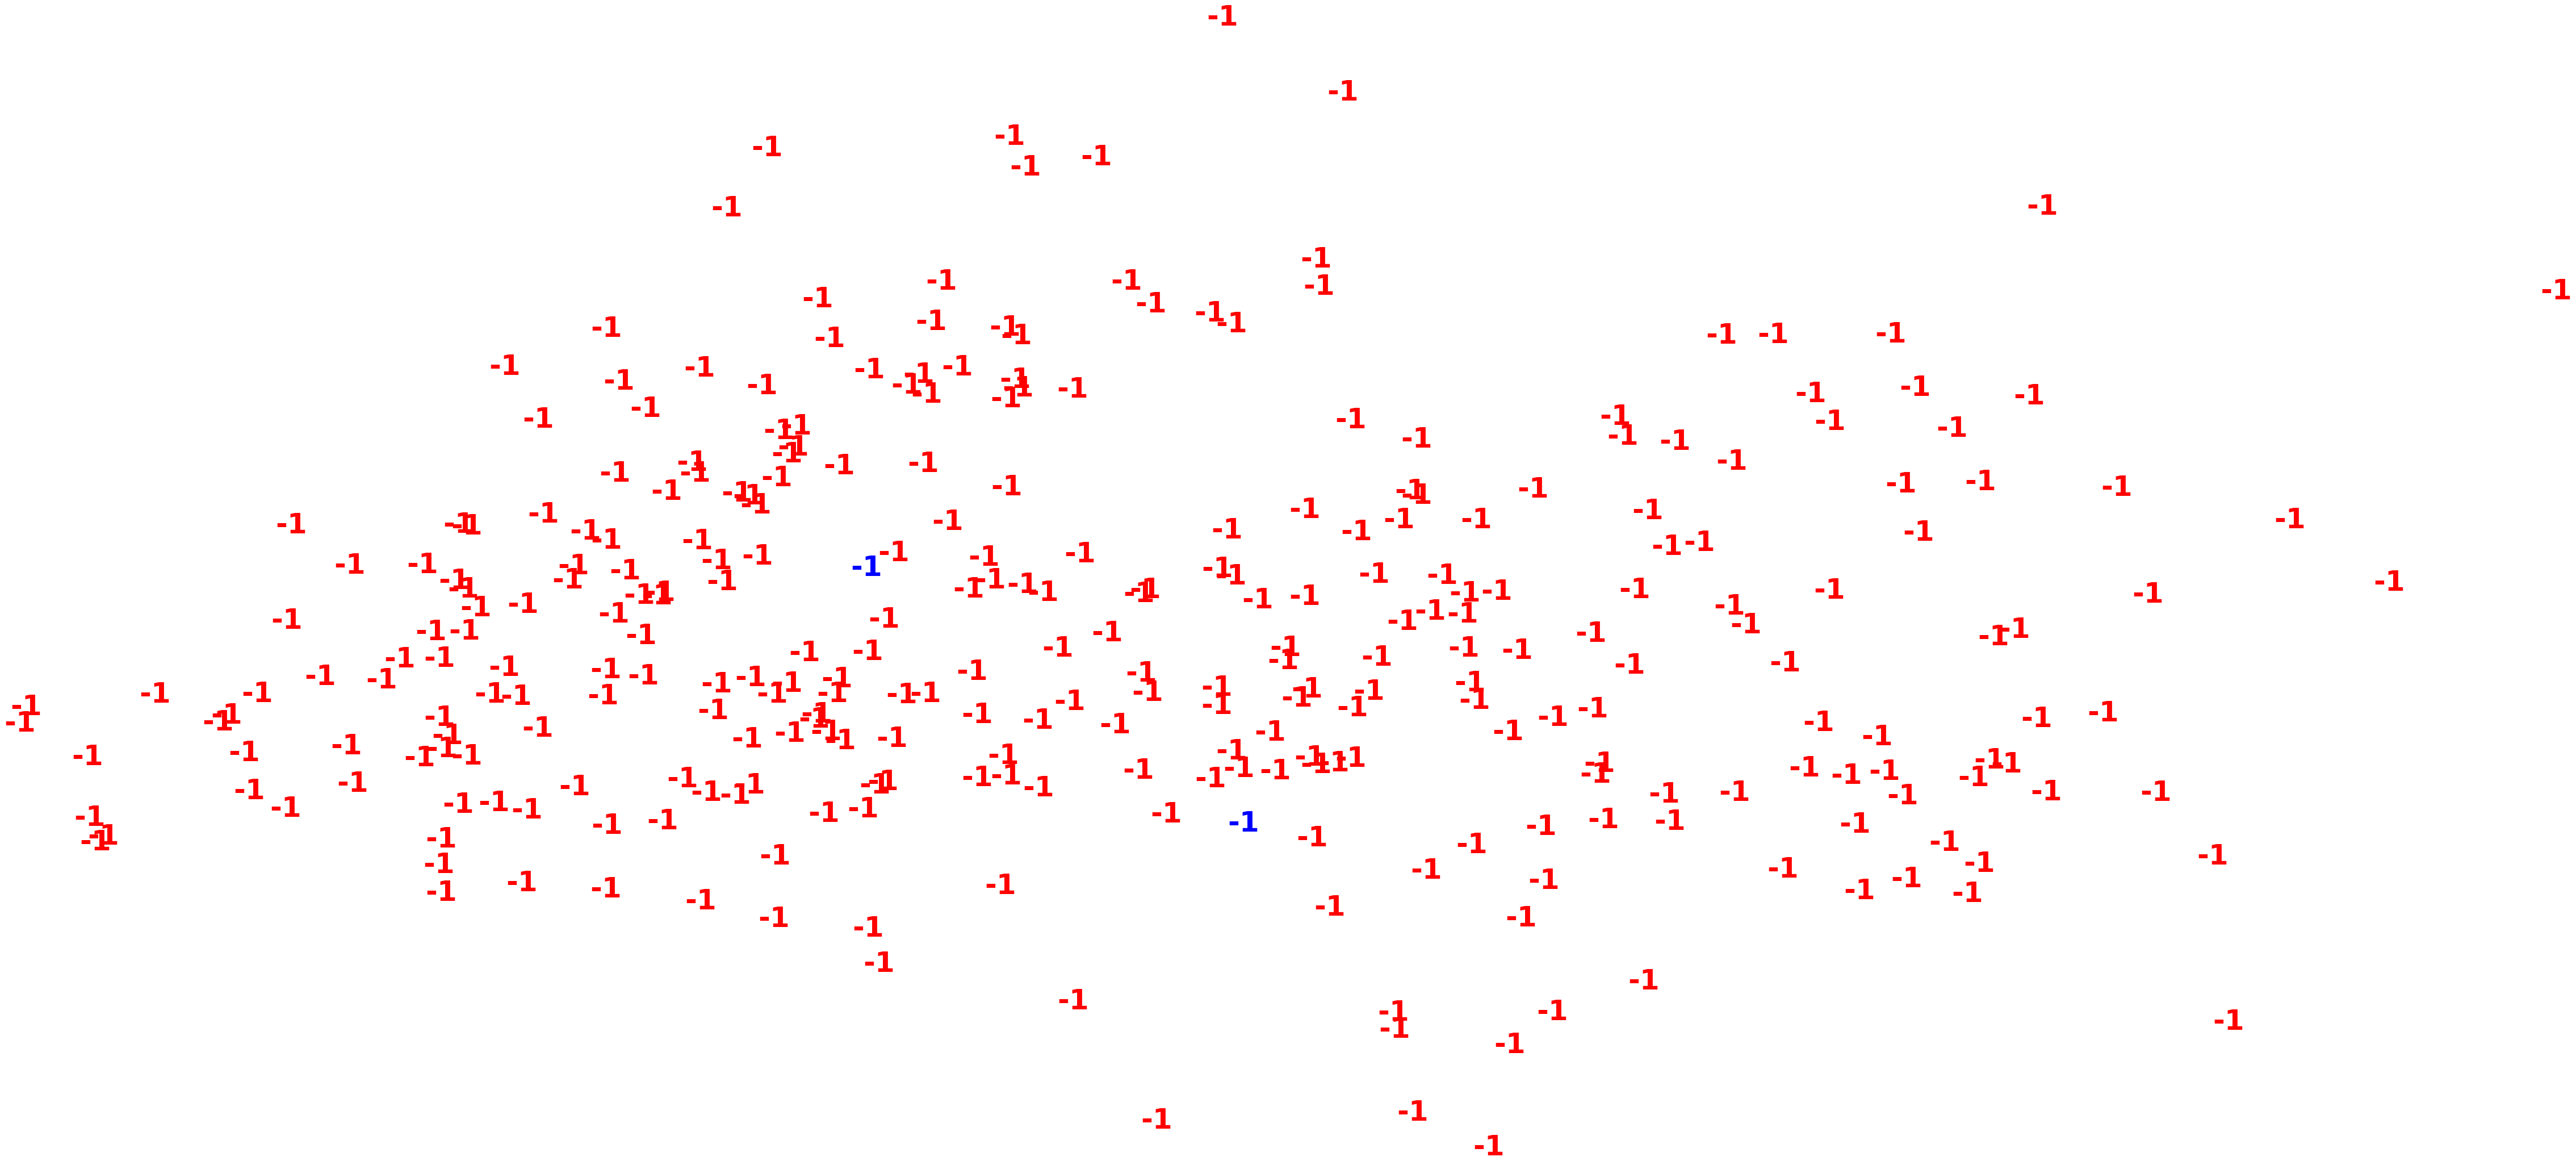

In [193]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### The results are not impressive at all. It just shows how difficult it is to find meaningful clusters. In this case -1 means noise. One improvement is to use a iteration function like GridSearch to try many different combinations of hyperparameters.